## Projeto Data Chellenge Banco Carrefour
#### Objetivo: Desenvolver uma aplicação para monitorar o top trending e seu devido volume na rede social com o passar do tempo.
#### Requisitos:
###### Utilizar a api do twitter para consumir o top trending e seu devido volume.
###### Armazenar o histórico das trendings em um banco de dados noSQL.
###### Utilizar alguma biblioteca gráfica para exibir os dados.
###### Utilizar IA para análise de sentimento dos tweets referentes aos top trendings(opcional)

## Instalando e Importando Bibliotecas 📚

In [1]:
import uvicorn
from fastapi import FastAPI
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import tweepy
from src.responses import TrendItem
from src.service import *
from src.tokens import CONSUMER_SECRET, CONSUMER_KEY, ACCESS_TOKEN_SECRET, ACCESS_TOKEN
from src.constants import *
from src.analyze_feeling import *

## Programando 💻

In [2]:
# Conectando/Criando a API
app = FastAPI()


@app.get("/trends", response_model=List[TrendItem])
def get_trends_route():
    return get_trends()


if __name__ == "__main__":
    trends = get_trends()

    if not trends:
        save_trends()

    uvicorn.run(app, host="0.0.0.0", port=8000)
    
# "Direcionando" o token de acesso
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

brazil_trends = api.trends_place(BRAZIL_WOE_ID)

trends = json.loads(json.dumps(brazil_trends, indent=1))

for trend in trends[0]["trends"]:
    print(trend["name"].strip("#"), trend["tweet_volume"])

teen wolf 140681
stiles 37044
dylan 53715
Grimes 34897
stydia 11138
Scott 79780
tyler posey None
Lydia 17316
UnlockLoveBack 34002
Kira 68704
jeff davis None
allison None
isaac 30155
malia None
Bruno Guimarães None
OUÇA MY UNIVERSE 18066
Suzane 16369
Carla Diaz 37747
Elon Musk 33607
THIAM None
Antony None
Navas None
Derek 37980
Bang Bang 199391
SIGA LOUD VICTOR NO IG None
Holland 17715
Alisson None
Paramount 18745
StaySelcaDay 112434
Astrid None
Alex Sandro None
askbilliestan None
JULIETTE NO ITAÚ None
Gabriel Jesus None
Eduardo Bolsonaro 20010
daniel sharman None
Raphinha None
Crystal 45675
beklebeni 29554
Sextou 39540
arden None
stranger things None
Cantillo None
Arana None
Bruno Mendez None
Doctor Who 50316
shelley None
ASSISTA SUBVERSIVA 11627
Chris Evans None
ONEPIECE1026 33463


In [3]:
for item in trends:
    trends = item["trends"]

In [4]:
df = pd.DataFrame(trends)

In [5]:
df_trends = df.rename(
    columns={
        "name": "Em Ascensão",
        "url": "URI",
        "promoted_content": "Patrocinado",
        "query": "Hashtag",
        "tweet_volume": "Volume"
    })

In [6]:
df_trends["Volume"].fillna(0, inplace=True)

In [8]:
df_trends.groupby("Em Ascensão")["Volume"].mean()

Em Ascensão
#ONEPIECE1026              33463.0
#StaySelcaDay             112434.0
#UnlockLoveBack            34002.0
#askbilliestan                 0.0
#beklebeni                 29554.0
ASSISTA SUBVERSIVA         11627.0
Alex Sandro                    0.0
Alisson                        0.0
Antony                         0.0
Arana                          0.0
Astrid                         0.0
Bang Bang                 199391.0
Bruno Guimarães                0.0
Bruno Mendez                   0.0
Cantillo                       0.0
Carla Diaz                 37747.0
Chris Evans                    0.0
Crystal                    45675.0
Derek                      37980.0
Doctor Who                 50316.0
Eduardo Bolsonaro          20010.0
Elon Musk                  33607.0
Gabriel Jesus                  0.0
Grimes                     34897.0
Holland                    17715.0
JULIETTE NO ITAÚ               0.0
Kira                       68704.0
Lydia                      17316.0
Navas   

Text(0.5, 1.0, 'Top Trendings do Twitter')

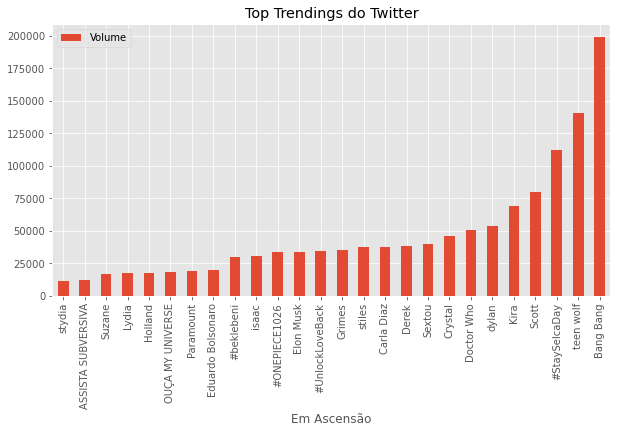

In [9]:
plt.style.use("ggplot")
gc = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
gc.plot("Em Ascensão", ["Volume"], kind="bar", figsize=(10, 5))
plt.title("Em Alta no Twitter")

Text(0.5, 1.0, 'Em Alta no Twitter')

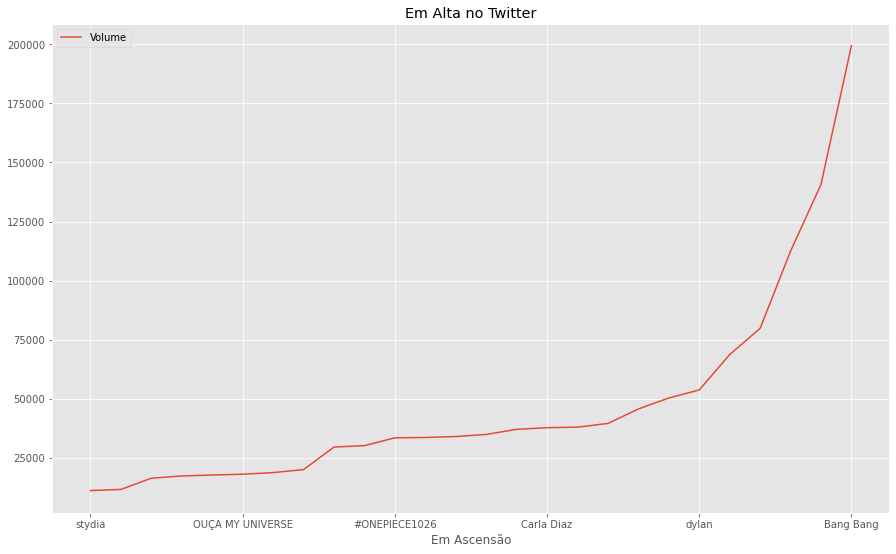

In [10]:
gc = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
gc.plot("Em Ascensão", ["Volume"], kind='line', figsize=(15, 9))
plt.title("Em Alta no Twitter")

Text(0.5, 1.0, 'Em Alta no Twitter')

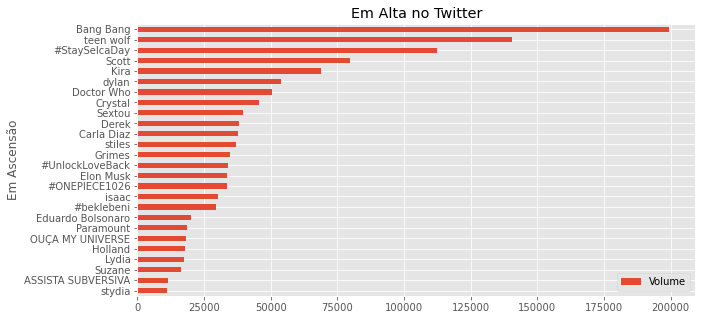

In [11]:
gc = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
gc.plot("Em Ascensão", ["Volume"], kind='barh', figsize=(10, 5))
plt.title("Em Alta no Twitter")

Text(0.5, 1.0, 'Em Alta no Twitter')

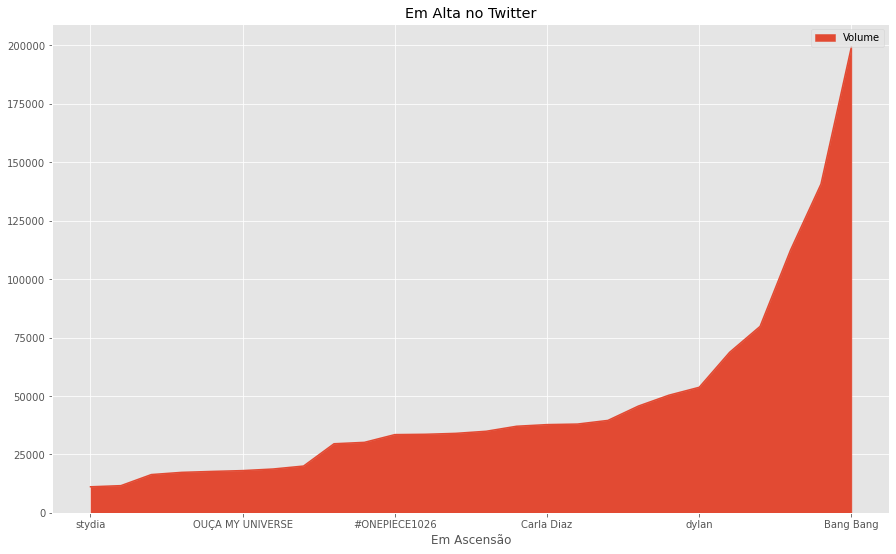

In [12]:
gc = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
gc.plot("Em Ascensão", ["Volume"], kind='area', figsize=(15, 9))
plt.title("Em Alta no Twitter")

In [13]:
# Analise de Sentimentos
df_trends["Subjetividade"] = df_trends['Em Ascensão'].apply(get_pola)
df_trends["Polaridade"] = df_trends["Em Ascensão"].apply(get_subj)

In [14]:
# Mostra um novo dataframe com as colunas subjetividade e polaridade
df_trends.head()

,Em Ascensão,URI,Patrocinado,Hashtag,Volume,Subjetividade,Polaridade
0,teen wolf,http://twitter.com/search?q=%22teen+wolf%22,None,%22teen+wolf%22,140681.0,0.0,0.0
1,stiles,http://twitter.com/search?q=stiles,None,stiles,37044.0,0.0,0.0
2,dylan,http://twitter.com/search?q=dylan,None,dylan,53715.0,0.0,0.0
3,Grimes,http://twitter.com/search?q=Grimes,None,Grimes,34897.0,0.0,0.0
4,stydia,http://twitter.com/search?q=stydia,None,stydia,11138.0,0.0,0.0


In [15]:
df_trends["Analise"] = df_trends["Polaridade"].apply(analyze)

In [16]:
# Printando apenas os tweets positivos
print("Tweets Positivos :\n")

# Ordenando os tweets
j = 1
sortedDF = df_trends.sort_values(by=["Polaridade"])
for i in range(0, sortedDF.shape[0]):
    if sortedDF["Analise"][i] == "Positivo":

        print(str(j) + ") " + sortedDF["Em Ascensão"][i])
        print()
        j = j+1

Tweets Positivos :

1) SIGA LOUD VICTOR NO IG



In [17]:
# Printando apenas os tweets negativos
print("Tweets Negativos: \n")

j = 1
sortedDF = df_trends.sort_values(by=['Polaridade'], ascending=False)
for i in range(0, sortedDF.shape[0]):
    if sortedDF["Analise"][i] == "Negativo":
        print(str(j) + ") "+sortedDF["Em Ascensão"][i])
        print()
        j = j+1


Tweets Negativos: 



In [18]:
# Printando apenas os tweets neutros
print("Tweets Neutros: \n")

j = 1
sortedDF = df_trends.sort_values(by=['Polaridade'], ascending=False)
for i in range(0, sortedDF.shape[0]):
    if sortedDF["Analise"][i] == "Neutro":
        print(str(j) + ") "+sortedDF["Em Ascensão"][i])
        print()
        j = j+1

Tweets Neutros: 

1) teen wolf

2) stiles

3) dylan

4) Grimes

5) stydia

6) Scott

7) tyler posey

8) Lydia

9) #UnlockLoveBack

10) Kira

11) jeff davis

12) allison

13) isaac

14) malia

15) Bruno Guimarães

16) OUÇA MY UNIVERSE

17) Suzane

18) Carla Diaz

19) Elon Musk

20) THIAM

21) Antony

22) Navas

23) Derek

24) Bang Bang

25) Holland

26) Alisson

27) Paramount

28) #StaySelcaDay

29) Astrid

30) Alex Sandro

31) #askbilliestan

32) JULIETTE NO ITAÚ

33) Gabriel Jesus

34) Eduardo Bolsonaro

35) daniel sharman

36) Raphinha

37) Crystal

38) #beklebeni

39) Sextou

40) arden

41) stranger things

42) Cantillo

43) Arana

44) Bruno Mendez

45) Doctor Who

46) shelley

47) ASSISTA SUBVERSIVA

48) Chris Evans

49) #ONEPIECE1026



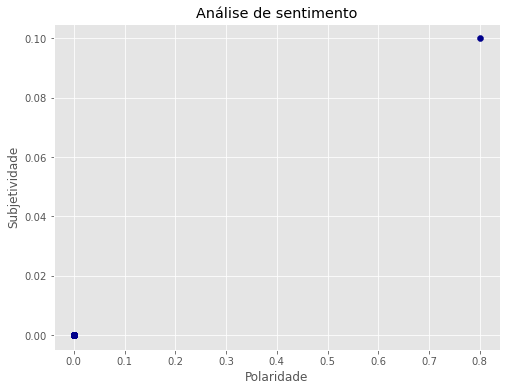

In [19]:
plt.figure(figsize=(8, 6))
for i in range(0, df_trends.shape[0]):
    plt.scatter(df_trends["Polaridade"][i], df_trends["Subjetividade"][i], color="darkblue")
plt.title("Análise de sentimento")
plt.xlabel("Polaridade")
plt.ylabel("Subjetividade")
plt.show()

In [20]:
# Porcentagem de tweets positivos
positive = df_trends[df_trends.Analise == "Positivo"]
positive = positive["Em Ascensão"]

print("A Porcentagem de Trendings Positivas é de:")
round((positive.shape[0] / df_trends.shape[0]) * 100, 1)

A Porcentagem de Trendings Positivas é de:


2.0

In [21]:
# Porcentagem de tweets negativos
negative = df_trends[df_trends.Analise == "Negativo"]
negative = negative["Em Ascensão"]

print("A porcentagem de Trendings Negativas é de: ")
round((negative.shape[0] / df_trends.shape[0]) * 100, 1)

A porcentagem de Trendings Negativas é de: 


0.0

In [22]:
# Porcentagem de tweets neutros
neutro = df_trends[df_trends.Analise == "Neutro"]
neutro = neutro["Em Ascensão"]

print("A porcentagem de Trendings Neutras é de: ")
round((neutro.shape[0] / df_trends.shape[0]) * 100, 1)

A porcentagem de Trendings Neutras é de: 


98.0

In [23]:
df = pd.DataFrame(df_trends["Analise"].value_counts())

Text(0, 0.5, 'Sentimento')

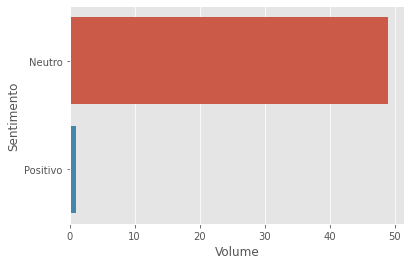

In [24]:
plt.figure()
ax = sns.barplot(x=df["Analise"], y=df.index, data=df_trends)
ax.set_xlabel("Volume")
ax.set_ylabel("Sentimento")

Text(0.5, 0, 'Sentimento')

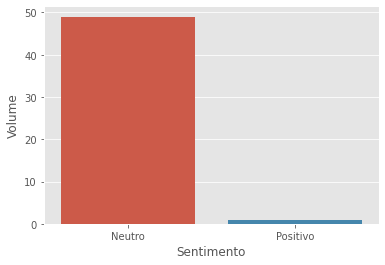

In [26]:
ax = sns.barplot(x=df.index, y=df["Analise"], data=df_trends, label="Volume")
ax.set_ylabel("Volume")
ax.set_xlabel("Sentimento")